In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'O3ZWCMV4EIGDHKWWEAXT14BQZ3SHDCDGFYDUVI1SWBMLUGVG' # your Foursquare ID
CLIENT_SECRET = 'C2PSLLDPRM0WZMZEKOLLSAN55YQ3PFSJTIMNTMTXSPHAECWJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30


latitude=40.0995305
longitude=-83.0919893

In [3]:
search_query = 'Indian'
radius = 1000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

Indian .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=O3ZWCMV4EIGDHKWWEAXT14BQZ3SHDCDGFYDUVI1SWBMLUGVG&client_secret=C2PSLLDPRM0WZMZEKOLLSAN55YQ3PFSJTIMNTMTXSPHAECWJ&ll=40.0995305,-83.0919893&v=20180604&query=Indian&radius=1000&limit=30'

In [4]:
import requests
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)



<h2><b>Data Wrangling</b></h2>

In [5]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.head()
dataframe_filtered.shape


(6, 15)

In [6]:
search_query = 'Restaurant'
radius = 1000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url


Restaurant .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=O3ZWCMV4EIGDHKWWEAXT14BQZ3SHDCDGFYDUVI1SWBMLUGVG&client_secret=C2PSLLDPRM0WZMZEKOLLSAN55YQ3PFSJTIMNTMTXSPHAECWJ&ll=40.0995305,-83.0919893&v=20180604&query=Restaurant&radius=1000&limit=30'

In [7]:
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues_all_rest = results['response']['venues']

# tranform venues into a dataframe
dataframe_all_rest = json_normalize(venues_all_rest)
dataframe_all_rest.head()




,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4b69f09cf964a52048bd2be3,Ba Sho Japanese Restaurant,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1572475061,False,2800 Festival Ln,at Sawmill Rd.,40.093434,-83.090655,"[{'label': 'display', 'lat': 40.09343371645922...",...,OH,United States,"[2800 Festival Ln (at Sawmill Rd.), Dublin, OH...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4f3293a519836c91c7e55462,Tumbleweed Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1572475061,False,6505 Dublin Center Dr,NaN,40.099801,-83.094334,"[{'label': 'display', 'lat': 40.099801, 'lng':...",...,OH,United States,"[6505 Dublin Center Dr, Dublin, OH 43017, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,57f04e1b498ed51bff25b6db,Fortune Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1572475061,False,NaN,NaN,40.094070,-83.087317,"[{'label': 'display', 'lat': 40.09406954040128...",...,OH,United States,"[Columbus, OH 43235, United States]",1155831,https://www.grubhub.com/restaurant/fortune-chi...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
3,4f32722619836c91c7d8959a,Maharaja Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1572475061,False,6665 Dublin Center Dr,NaN,40.102362,-83.094097,"[{'label': 'display', 'lat': 40.102362, 'lng':...",...,OH,United States,"[6665 Dublin Center Dr, Dublin, OH 43017, Unit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4cc0c2e9967d5481f79e7357,Tadka Indian Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1572475061,False,3535 W Dublin Granville Rd,Sawmill road,40.092982,-83.085161,"[{'label': 'display', 'lat': 40.09298236111583...",...,OH,United States,"[3535 W Dublin Granville Rd (Sawmill road), Co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe_all_rest.columns if col.startswith('location.')] + ['id']
dataframe_all_rest_filtered = dataframe_all_rest.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_all_rest_filtered['categories'] = dataframe_all_rest_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_all_rest_filtered.columns = [column.split('.')[-1] for column in dataframe_all_rest_filtered.columns]
dataframe_all_rest_filtered
dataframe_all_rest_filtered.shape


(10, 15)

In [9]:
dataframe_filtered.name
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the new Restaurant

# add a red circle marker to represent the new Restaurant
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New Restaurant',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers

for lat, lng, label in zip(dataframe_all_rest_filtered.lat, dataframe_all_rest_filtered.lng, dataframe_all_rest_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# display map
venues_map

In [10]:
# Perform sam analysis for New Albany Suburb

latitude=40.0609175
longitude=-82.86072997
search_query = 'Indian'
radius = 1000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
search_query = 'Restaurant'
radius = 1000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues_all_rest = results['response']['venues']

# tranform venues into a dataframe
dataframe_all_rest = json_normalize(venues_all_rest)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe_all_rest.columns if col.startswith('location.')] + ['id']
dataframe_all_rest_filtered = dataframe_all_rest.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_all_rest_filtered['categories'] = dataframe_all_rest_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_all_rest_filtered.columns = [column.split('.')[-1] for column in dataframe_all_rest_filtered.columns]
dataframe_filtered.name
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the new Restaurant

# add a red circle marker to represent the new Restaurant
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New Restaurant',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(dataframe_all_rest_filtered.lat, dataframe_all_rest_filtered.lng, dataframe_all_rest_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    

# display map
venues_map

Indian .... OK!
Restaurant .... OK!


<b>Getting the published json data from the website and using that json to write the data into a dataframe dublin_df, subsequently doing the same for NA_df to get all the json data into their respective dataframes. Then, merge the two datafranes with .merge().</b>

In [11]:
# Create URL to JSON file (alternatively this can be a filepath)
# data for Dublin got from http://worldpopulationreview.com/us-cities/dublin-oh-population/
# data for New Albany got from http://worldpopulationreview.com/us-cities/new-albany-oh-population/

url = 'https://raw.githubusercontent.com/seethaparamesh/github-example/master/Dublin%20Demo%20data.json'

# Load the first sheet of the JSON file into a data frame
dublin_df = pd.read_json(url, orient='split')

# View the first ten rows
dublin_df.drop(['Bachelors','High School'], axis=1, inplace =True)
dublin_df.columns = ['Race','Dublin Population']


# Create URL to JSON file (alternatively this can be a filepath)
url = 'https://raw.githubusercontent.com/seethaparamesh/github-example/master/New%20Albany%20Demo.json'

# Load the first sheet of the JSON file into a data frame
NA_df = pd.read_json(url, orient='split')

# View the first ten rows
NA_df.drop(['Bachelors','High School'], axis=1, inplace =True)
NA_df.columns = ['Race','New Albany Population']

merge_df = pd.merge(dublin_df, NA_df, how='inner', on='Race')
merge_df

,Race,Dublin Population,New Albany Population
0,White,21967,5142
1,Asian,5216,489
2,Hispanic,814,51
3,Black,603,534
4,Multiple Races,434,57
5,Other Race,164,36
6,Native American,46,9


<b>Now fetching the json average household income data for both the locations from the website and 
creating dataframes accordingly and merging the resulting dataframes</b>

In [18]:
# Create URL to JSON file (alternatively this can be a filepath)
url = 'https://raw.githubusercontent.com/seethaparamesh/github-example/master/Dublin%20Income.json'

# Load the first sheet of the JSON file into a data frame
dublinincome_df = pd.read_json(url, orient='split')
dublinincome_df

dublinincome_df.drop(['Female','Male'], axis=1, inplace =True)
dublinincome_df.columns = ['Name','Average Income Per Household-Dublin']
dublinincome_df

,Name,Average Income Per Household-Dublin
0,Overall,74350
1,Less Than High School,47807
2,High School Grad,42335
3,Some College,43263
4,Bachelors Degree,72718
5,Graduate Degree,102136


In [19]:
url='https://raw.githubusercontent.com/seethaparamesh/github-example/master/New%20Albany%20Income.json'

# Load the first sheet of the JSON file into a data frame
NAincome_df = pd.read_json(url, orient='split')



NAincome_df.drop(['Female','Male'], axis=1, inplace =True)
NAincome_df.columns = ['Name', 'Average Income Per Household-New Albany']
NAincome_df



,Name,Average Income Per Household-New Albany
0,Overall,100080
1,Less Than High School,0
2,High School Grad,31125
3,Some College,55192
4,Bachelors Degree,98397
5,Graduate Degree,132578


In [20]:
merge1_df = pd.merge(dublinincome_df,NAincome_df,how='inner',on='Name')
merge1_df

,Name,Average Income Per Household-Dublin,Average Income Per Household-New Albany
0,Overall,74350,100080
1,Less Than High School,47807,0
2,High School Grad,42335,31125
3,Some College,43263,55192
4,Bachelors Degree,72718,98397
5,Graduate Degree,102136,132578


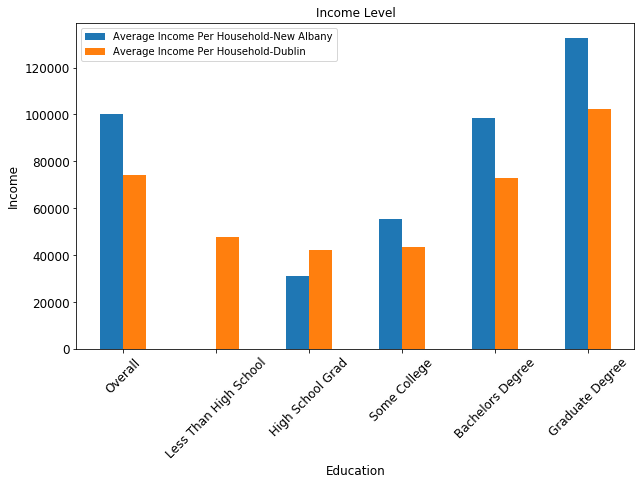

In [21]:
import matplotlib.pyplot as plt
ax = merge1_df[['Average Income Per Household-New Albany','Average Income Per Household-Dublin']].plot(kind='bar', title ="Income Level", figsize=(10, 6), legend=True, fontsize=12)
ax.set_xlabel("Education", fontsize=12)
ax.set_ylabel("Income", fontsize=12)
ax.set_xticklabels(merge1_df.Name, rotation=45)
plt.show()

In [22]:
# validate that analysis of data got from worldpopulationreview.com/us-cities/new-albany-oh-population/ matches a secondary source.
# US Census data got from https://www.census.gov/quickfacts/fact/csv/newalbanycityohio,dublincityohio/PST045218

data=pd.read_csv('https://raw.githubusercontent.com/seethaparamesh/github-example/master/NewAlbany-Dublin.Census.Data.csv')
data

,Fact,"New Albany city, Ohio","Dublin city, Ohio"
0,"Population estimates, July 1, 2018, (V2018)","10,889","48,647"
1,"Population estimates base, April 1, 2010, (V2...","7,867","41,364"
2,"Population, percent change - April 1, 2010 (es...",38.40%,17.60%
3,"Population, Census, April 1, 2010","7,724","41,751"
4,"Total retail sales per capita, 2012","$74,083","$23,251"
5,"Mean travel time to work (minutes), workers ag...",20.7,24.3
6,"Median household income (in 2017 dollars), 201...","$187,200","$128,916"
7,Per capita income in past 12 months (in 2017 d...,"$76,811","$58,386"


<h3><u>Analysis</u></h3>
Based on Census data
<ul>
    <li>Population of New Albany is growing at 38.4% in the past 8 years as compared to only 17.6% for Dublin.</li>
    <li>Average medium income from Census data also match the previous analysis that New Albany is more affluent for high earners.</li>
    <li>Per Capita of retail sales also show that Consumer Expenditure is significanly higher in New Albany as compared to Dublin.</li>
</ul>
    

In [23]:
# Perform same analysis for Farmington Hills, Michigan Suburb

latitude=42.4891809
longitude=-83.3793727
search_query = 'Indian'
radius = 5000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()



Indian .... OK!


In [24]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,5061df25498ee603149e1f64,Punjab Sweet & Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1572475513,False,29205 Orchard Lake Rd,Behind ABC Warehouse,42.510937,-83.360225,"[{'label': 'display', 'lat': 42.51093748929599...",...,Farmington Hills,MI,United States,"[29205 Orchard Lake Rd (Behind ABC Warehouse),...",NaN,NaN,NaN,NaN,NaN,NaN
1,4c05371e3022952150e8de81,Aahar Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1572475513,False,35564 Grand River Ave,at Drake Rd.,42.470106,-83.397682,"[{'label': 'display', 'lat': 42.47010558084106...",...,Farmington Hills,MI,United States,"[35564 Grand River Ave (at Drake Rd.), Farming...",NaN,NaN,NaN,NaN,NaN,NaN
2,54f114ac498e5d06536e32d4,Aroma Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1572475513,False,29210 Orchard Lake Rd,NaN,42.511461,-83.358917,"[{'label': 'display', 'lat': 42.51146059807853...",...,Farmington Hills,MI,United States,"[29210 Orchard Lake Rd, Farmington Hills, MI 4...",767841,https://www.grubhub.com/restaurant/aroma-india...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png
3,4f32055419833175d60a6e92,Zyka Indian Kitchen,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1572475513,False,34749 Grand River Ave,NaN,42.468790,-83.389690,"[{'label': 'display', 'lat': 42.46879, 'lng': ...",...,Farmington,MI,United States,"[34749 Grand River Ave, Farmington, MI 48335, ...",NaN,NaN,NaN,NaN,NaN,NaN
4,5c8b5cce2619ee002cfae041,Bay Leaf Authentic Indian Cuisine,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1572475513,False,35203 Grand River Ave,NaN,42.468244,-83.395133,"[{'label': 'display', 'lat': 42.4682436, 'lng'...",...,Farmington,MI,United States,"[35203 Grand River Ave, Farmington, MI 48335, ...",NaN,NaN,NaN,NaN,NaN,NaN
5,4c0536700b8eef3bad13b982,Sri Balaji Foods Indian Restaurant & Grocery S...,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1572475513,False,24305 Halsted Rd,just north of Grand River Ave.,42.469440,-83.415750,"[{'label': 'display', 'lat': 42.46944, 'lng': ...",...,Farmington Hills,MI,United States,[24305 Halsted Rd (just north of Grand River A...,NaN,NaN,NaN,NaN,NaN,NaN
6,50f5a68de4b0e3ab9e3f37d7,Saffron Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1572475513,False,29200 Orchard Lake Rd.,NaN,42.510804,-83.358407,"[{'label': 'display', 'lat': 42.51080398076389...",...,Farmington,MI,United States,"[29200 Orchard Lake Rd., Farmington, MI 48334,...",NaN,NaN,NaN,NaN,NaN,NaN
7,4e01141ab0fbdf39a456470e,The Creek,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1572475513,False,Indian creek Dr,9 mile,42.453793,-83.388091,"[{'label': 'display', 'lat': 42.45379344777485...",...,Farmington Hills,MI,United States,"[Indian creek Dr (9 mile), Farmington Hills, M...",NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Punjab Sweet & Indian Cuisine,Indian Restaurant,29205 Orchard Lake Rd,Behind ABC Warehouse,42.510937,-83.360225,"[{'label': 'display', 'lat': 42.51093748929599...",2887,48334,US,Farmington Hills,MI,United States,"[29205 Orchard Lake Rd (Behind ABC Warehouse),...",5061df25498ee603149e1f64
1,Aahar Indian Cuisine,Indian Restaurant,35564 Grand River Ave,at Drake Rd.,42.470106,-83.397682,"[{'label': 'display', 'lat': 42.47010558084106...",2601,48335,US,Farmington Hills,MI,United States,"[35564 Grand River Ave (at Drake Rd.), Farming...",4c05371e3022952150e8de81
2,Aroma Indian Cuisine,Indian Restaurant,29210 Orchard Lake Rd,NaN,42.511461,-83.358917,"[{'label': 'display', 'lat': 42.51146059807853...",2994,48334,US,Farmington Hills,MI,United States,"[29210 Orchard Lake Rd, Farmington Hills, MI 4...",54f114ac498e5d06536e32d4
3,Zyka Indian Kitchen,Indian Restaurant,34749 Grand River Ave,NaN,42.468790,-83.389690,"[{'label': 'display', 'lat': 42.46879, 'lng': ...",2422,48335,US,Farmington,MI,United States,"[34749 Grand River Ave, Farmington, MI 48335, ...",4f32055419833175d60a6e92
4,Bay Leaf Authentic Indian Cuisine,Indian Restaurant,35203 Grand River Ave,NaN,42.468244,-83.395133,"[{'label': 'display', 'lat': 42.4682436, 'lng'...",2665,48335,US,Farmington,MI,United States,"[35203 Grand River Ave, Farmington, MI 48335, ...",5c8b5cce2619ee002cfae041
5,Sri Balaji Foods Indian Restaurant & Grocery S...,Indian Restaurant,24305 Halsted Rd,just north of Grand River Ave.,42.469440,-83.415750,"[{'label': 'display', 'lat': 42.46944, 'lng': ...",3707,48335,US,Farmington Hills,MI,United States,[24305 Halsted Rd (just north of Grand River A...,4c0536700b8eef3bad13b982
6,Saffron Restaurant,Indian Restaurant,29200 Orchard Lake Rd.,NaN,42.510804,-83.358407,"[{'label': 'display', 'lat': 42.51080398076389...",2958,48334,US,Farmington,MI,United States,"[29200 Orchard Lake Rd., Farmington, MI 48334,...",50f5a68de4b0e3ab9e3f37d7
7,The Creek,Residential Building (Apartment / Condo),Indian creek Dr,9 mile,42.453793,-83.388091,"[{'label': 'display', 'lat': 42.45379344777485...",4003,NaN,US,Farmington Hills,MI,United States,"[Indian creek Dr (9 mile), Farmington Hills, M...",4e01141ab0fbdf39a456470e
